In [112]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [113]:
DIR_PATH = 'C:/programmering/DTU/robobot/data/images'
CM_PATH = 'C:/programmering/DTU/robobot/config/camera/calibration_matrix.npy'
DIST_PATH = 'C:/programmering/DTU/robobot/config/camera/distortion_coefficients.npy'

In [114]:
mtx = np.load(CM_PATH)
dist = np.load(DIST_PATH)

In [ ]:
files = os.listdir(DIR_PATH)


images = [cv2.imread(f"{DIR_PATH}/image_{i}.jpg") for i in range(1, len(files)+1)]
# images = [cv2.imread(os.path.join(DIR_PATH, f)) for f in files]
images = [cv2.cvtColor(img, cv2.COLOR_BGR2RGB) for img in images]

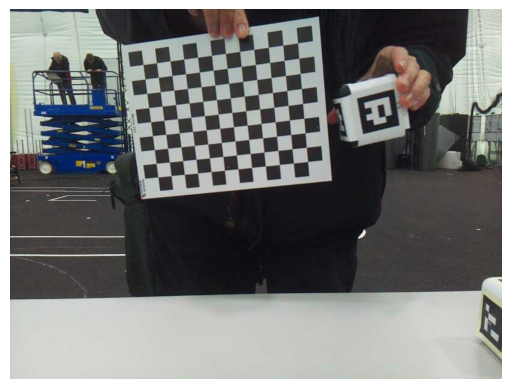

In [133]:
i = 4
plt.imshow(images[i])
plt.axis('off')  # Hide axes
plt.show()

In [134]:
aruco_dict = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_4X4_100)
parameters = cv2.aruco.DetectorParameters()

# Create the ArUco detector
detector = cv2.aruco.ArucoDetector(aruco_dict, parameters)
# Detect the markers
corners, ids, rejected = detector.detectMarkers(cv2.cvtColor(images[4], cv2.COLOR_BGR2GRAY))


In [ ]:
marker_size = 50

marker_points = np.array([[-marker_size / 2, marker_size / 2, 0],
                            [marker_size / 2, marker_size / 2, 0],
                            [marker_size / 2, -marker_size / 2, 0],
                            [-marker_size / 2, -marker_size / 2, 0]], dtype=np.float32)


print("Detected markers:", ids)
if ids is not None:
    cv2.aruco.drawDetectedMarkers(images[4], corners, ids)
    
    ret,rvecs, tvecs = cv2.solvePnP(marker_points, corners[0], mtx, dist)    
    
    cv2.drawFrameAxes(images[4], mtx, dist, rvecs, tvecs, marker_size)
    
    cv2.imshow('Detected Markers', images[4])
    cv2.waitKey(0)
    cv2.destroyAllWindows()

Detected markers: [[53]]


In [143]:
tvecs

array([[ 176.28542121],
       [-125.15517796],
       [ 562.57669509]])

In [126]:
corners[0]

array([[[588., 207.],
        [578., 149.],
        [639., 134.],
        [649., 192.]]], dtype=float32)